In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
import random
from math import dist

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Pokemon.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
data.sort_values("Total", ascending = False)

data_sin = data.query('Legendary == False ')
data1 = data.drop(['#', 'Name', 'Type 1', 'Type 2', 'Total','Generation', 'Legendary'] , axis=1)

In [6]:
data1

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


* La clase 0 son los que tienen la defensa normal ("podríamos decir defensivos")
* La clase 1 son más equilibrados en todas las líneas
* La clase 2 son los más rápidos y con mayor ataque

In [7]:
data1 = data.drop(['#', 'Name', 'Type 1', 'Type 2', 'Total','Generation', 'Legendary'] , axis=1)

#### Escalamos los datos 

In [8]:
scaler=StandardScaler().fit(data1)
dt=scaler.transform(data1)
data1 = pd.DataFrame(dt, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
data1.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
kmeans.labels_

array([1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,

In [10]:
data["kmeans3"] = kmeans.labels_

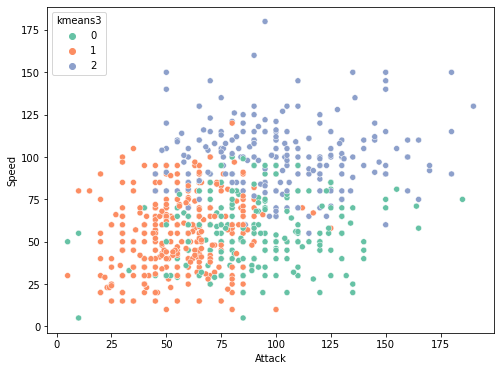

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data["Attack"],data["Speed"],hue = data["kmeans3"], palette="Set2")
plt.show()

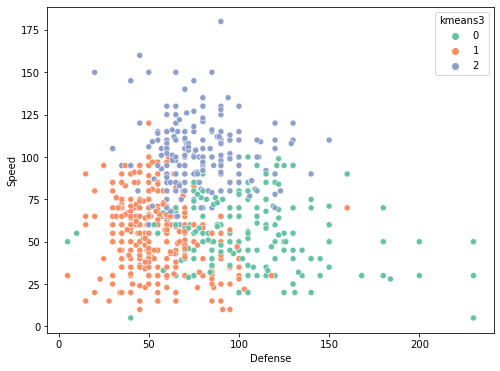

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data["Defense"],data["Speed"],hue = data["kmeans3"], palette="Set2")
plt.show()


#### Aquí lo hacemos sin los pokemon de tipo legendario

In [13]:
data_sin = data.query('Legendary == False ')
data_sin = data_sin.drop(['#', 'Name', 'Type 1', 'Type 2', 'Total','Generation', 'Legendary','kmeans3'] , axis=1)

In [14]:
scaler=StandardScaler().fit(data_sin)
dt=scaler.transform(data_sin)
data_sin1 = pd.DataFrame(dt, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
data_sin1.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.894738,-0.875284,-0.742384,-0.118823,-0.151744,-0.735182
1,-0.289703,-0.448627,-0.281668,0.397139,0.433009,-0.196081
2,0.517010,0.207769,0.376497,1.085088,1.212680,0.522720
3,0.517010,0.798526,1.692828,1.841832,1.992351,0.522720
4,-1.136752,-0.776825,-0.939833,-0.290811,-0.736497,-0.016381


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_sin1)
kmeans.labels_

array([0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0,

In [16]:
data_sin_original= data.query('Legendary == False ')

In [17]:
data_sin_original["kmeans_sin_orig"] = kmeans.labels_

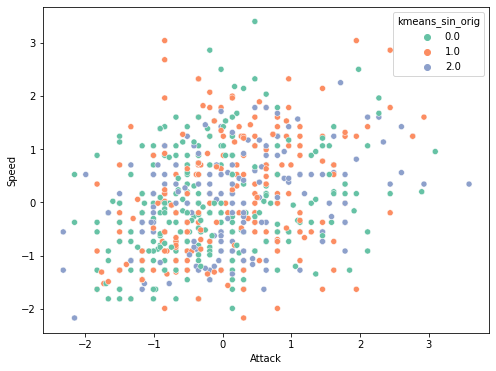

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data_sin1["Attack"],data_sin1["Speed"],hue = data_sin_original["kmeans_sin_orig"], palette="Set2")
plt.show()

### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
X = data_sin1

In [23]:
epsilon = 1.4
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(data_sin1)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0

In [24]:
data_sin["dbscan"] = labels

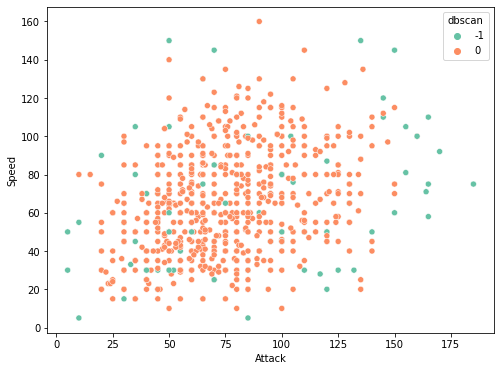

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data_sin["Attack"],data_sin["Speed"],hue = data_sin["dbscan"], palette="Set2")
plt.show()

In [26]:
data_sin.groupby("dbscan").mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
dbscan,,,,,,
-1,85.917808,87.287671,95.301370,80.753425,91.630137,64.739726
0,65.116314,74.388218,68.941088,67.098187,66.385196,65.534743


### DBSCAN con todos los pokemon (mirar generaciones)

In [27]:
scaler=StandardScaler().fit(data1)
dt=scaler.transform(data1)

In [28]:
data1_escalado = pd.DataFrame(dt, columns=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

In [29]:
from sklearn.cluster import DBSCAN
X = data1_escalado

In [30]:
epsilon = 0.9
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(data1_escalado)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,
       -1, -1,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
       -1, -1, -1, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,
        0, -1, -1, -1,  0,  0,  0,  0,  3, -1, -1, -1,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  4,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0

In [31]:
db.get_params()

{'algorithm': 'auto',
 'eps': 0.9,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 3,
 'n_jobs': None,
 'p': None}

In [32]:
data['dbscan'] = labels

In [33]:
data.sort_values('Total', ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,kmeans3,dbscan
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,2,-1
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,2,-1
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,2,-1
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,2,-1
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,1,0
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False,1,0
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False,1,0
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False,1,0


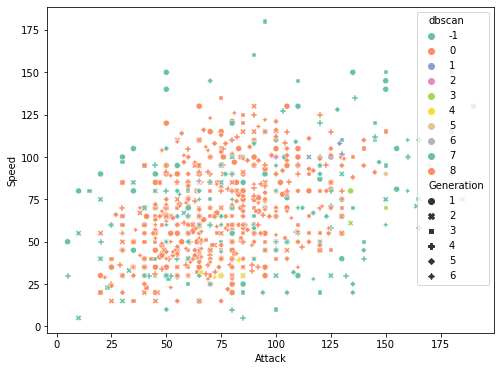

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data["Attack"],data["Speed"], hue = data["dbscan"], style= data['Generation'],  palette="Set2")
plt.show()